## 1. Import the Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read the data

In [6]:
visa_df = pd.read_csv(r"C:\Users\D.JYOTSNA\OneDrive\Documents\Full Stack Data Science\2. DataFiles\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## 3. Divide the data in numerical and categorical columns

In [13]:
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [15]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [17]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [21]:
visa_df[['continent','case_status']].head()

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified


- How many are certified from Asia

- How many are Denied From Asia

In [26]:
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con = con1 & con2
len(visa_df[con])

11012

In [36]:
continent_unique = visa_df['continent'].unique()
case_unique = visa_df['case_status'].unique()
certi_data,deni_data = [],[]
for i in continent_unique:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    cert = con1 & con2
    deni = con1 & con3
    certi_data.append(len(visa_df[cert]))
    deni_data.append(len(visa_df[deni]))
certi_data,deni_data

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [40]:
pd.DataFrame(zip(certi_data,deni_data), index = continent_unique, columns = case_unique)

,Denied,Certified
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


## CrossTab

In [48]:
index_col = visa_df['continent']
val_col = visa_df['case_status']
r1 = pd.crosstab(index_col,val_col)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

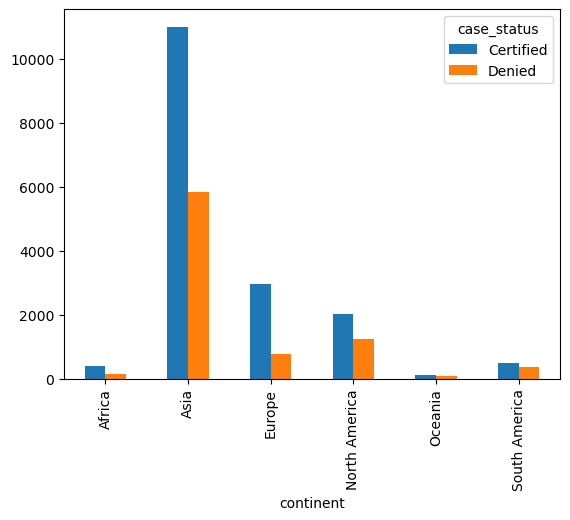

In [50]:
r1.plot(kind = 'bar')

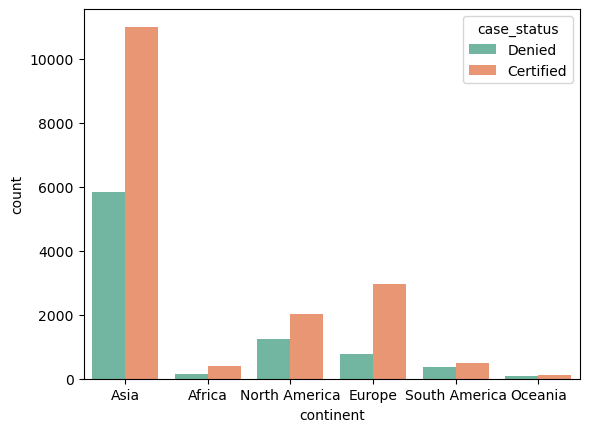

In [70]:
sns.countplot(visa_df, x = 'continent', hue = 'case_status', palette = 'Set2')
plt.show()